### Author: KR
### Date: 01/05/2024

### Adult Income analysis

1 - Load the necessary libraries.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2 - Read the adult income dataset from the following URL: https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Chapter04/Activity06/.

In [6]:
# Loading the data from the csv file
df = pd.read_csv("adult_income_data.csv")

df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


3 - Create a script that will read a text file line by line.

In [7]:
# Reading the file line by line
names = []
with open('adult_income_names.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)
        
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

4 - Add a name of Income for the response variable to the dataset.

In [8]:
# Adding 'Income' to the dataset
names.append('Income')
df = pd.read_csv("adult_income_data.csv",names=names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


5 - Find the missing values.

In [9]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

6 - Create a DataFrame with only age, education, and occupation by using subsetting. 

In [10]:
# Create a new DataFrame with selected columns
subset_df = df[['age', 'education', 'occupation']]

subset_df.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


7 - Plot a histogram of age with a bin size of 20.

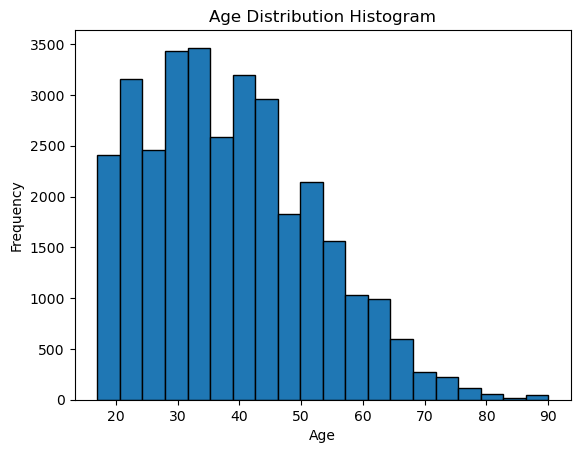

In [11]:
# Create the histogram
plt.hist(subset_df['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

plt.show()

8 - Create a function to strip the whitespace characters.

In [15]:
# Define strip function
def strip_whitespace(text):
    if isinstance(text, str):
        return text.strip()
    else:
        return text

9 - Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

In [21]:
import warnings

# Disable the SettingWithCopyWarning
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Education column
subset_df['education_stripped']=df['education'].apply(strip_whitespace)
subset_df['education']=subset_df['education_stripped']
subset_df.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
subset_df['occupation_stripped']=df['occupation'].apply(strip_whitespace)
subset_df['occupation']=subset_df['occupation_stripped']
subset_df.drop(labels=['occupation_stripped'],axis=1,inplace=True)

10 - Find the number of people who are aged between 30 and 50.

In [22]:
# Select rows where age is between 30 and 50
age_between_30_and_50 = subset_df[(subset_df['age'] >= 30) & (subset_df['age'] <= 50)]
count_people_between_30_and_50 = len(age_between_30_and_50)

# Print the result
print("Number of people aged between 30 and 50:", count_people_between_30_and_50)

Number of people aged between 30 and 50: 16390


11 - Group the records based on age and education to find how the mean age is distributed.

In [25]:
# Group subset to find the mean
subset_df.groupby(['age', 'education']).mean(numeric_only=True)

Empty DataFrame
Columns: []
Index: [(17, 10th), (17, 11th), (17, 12th), (17, 5th-6th), (17, 7th-8th), (17, 9th), (17, HS-grad), (17, Some-college), (18, 10th), (18, 11th), (18, 12th), (18, 5th-6th), (18, 7th-8th), (18, 9th), (18, HS-grad), (18, Masters), (18, Some-college), (19, 10th), (19, 11th), (19, 12th), (19, 1st-4th), (19, 5th-6th), (19, 7th-8th), (19, 9th), (19, Assoc-acdm), (19, Assoc-voc), (19, Bachelors), (19, HS-grad), (19, Preschool), (19, Some-college), (20, 10th), (20, 11th), (20, 12th), (20, 1st-4th), (20, 5th-6th), (20, 7th-8th), (20, 9th), (20, Assoc-acdm), (20, Assoc-voc), (20, Bachelors), (20, HS-grad), (20, Masters), (20, Preschool), (20, Some-college), (21, 10th), (21, 11th), (21, 12th), (21, 1st-4th), (21, 5th-6th), (21, 7th-8th), (21, 9th), (21, Assoc-acdm), (21, Assoc-voc), (21, Bachelors), (21, HS-grad), (21, Masters), (21, Preschool), (21, Some-college), (22, 10th), (22, 11th), (22, 12th), (22, 1st-4th), (22, 5th-6th), (22, 7th-8th), (22, 9th), (22, Assoc-acdm), (22, Assoc-voc), (22, Bachelors), (22, HS-grad), (22, Some-college), (23, 10th), (23, 11th), (23, 12th), (23, 1st-4th), (23, 5th-6th), (23, 7th-8th), (23, 9th), (23, Assoc-acdm), (23, Assoc-voc), (23, Bachelors), (23, HS-grad), (23, Masters), (23, Preschool), (23, Some-college), (24, 10th), (24, 11th), (24, 12th), (24, 1st-4th), (24, 5th-6th), (24, 7th-8th), (24, 9th), (24, Assoc-acdm), (24, Assoc-voc), (24, Bachelors), (24, Doctorate), (24, HS-grad), (24, Masters), (24, Preschool), (24, Some-college), (25, 10th), ...]

[965 rows x 0 columns]

12 - Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile.

In [28]:
# Group by occupation and calculate summary statistics for age
occupation_stats = subset_df.groupby('occupation')['age'].describe()
occupation_stats

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [29]:
# Profession with the oldest workers on average
oldest_profession = occupation_stats[occupation_stats['mean'] == occupation_stats['mean'].max()]
oldest_profession

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0


In [31]:
# Profession with the largest share of the workforce above the 75th percentile
above_75_percentile_profession = occupation_stats[occupation_stats['75%'] == occupation_stats['75%'].max()]
above_75_percentile_profession

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.8828,20.33635,17.0,21.0,35.0,61.0,90.0


13 - Use subset and groupby to find outliers.

In [37]:
# Calculate the IQR for the 'age' column
Q1 = subset_df['age'].quantile(0.25)
Q3 = subset_df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = subset_df[(subset_df['age'] < lower_bound) | (subset_df['age'] > upper_bound)]

print("Number of outliers in the 'age' column:", len(outliers))

Number of outliers in the 'age' column: 143


14 - Plot the values on a bar chart.

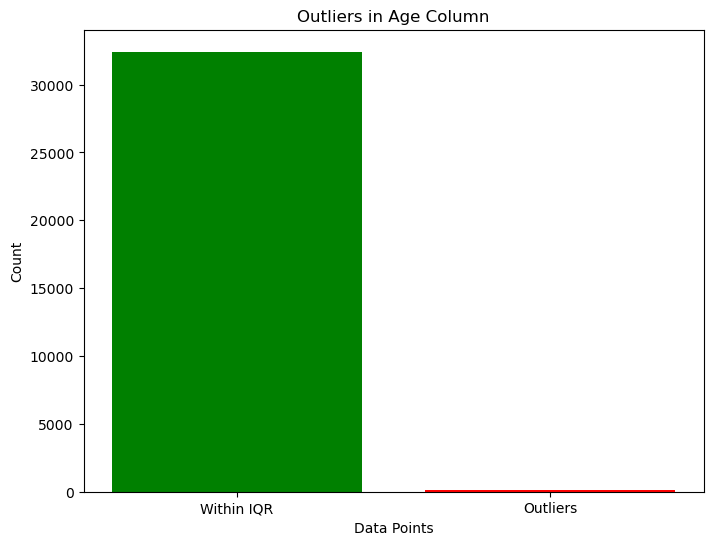

In [38]:
# Create a bar chart to visualize the number of outliers
plt.figure(figsize=(8, 6))
plt.bar(['Within IQR', 'Outliers'], [len(subset_df) - len(outliers), len(outliers)], color=['green', 'red'])
plt.xlabel('Data Points')
plt.ylabel('Count')
plt.title('Outliers in Age Column')
plt.show()

15 - Merge the data using common keys.

In [41]:
df_1 = df[['age','workclass','occupation']].sample(5,random_state=101)
df_2 = df[['education','occupation']].sample(5,random_state=101)
df_merged = pd.merge(df_1,df_2,on='occupation',how='inner').drop_duplicates()
df_merged

,age,workclass,occupation,education
0,51,Private,Machine-op-inspct,HS-grad
1,19,Private,Sales,11th
2,40,Private,Exec-managerial,HS-grad
3,17,Private,Handlers-cleaners,10th
4,61,Private,Craft-repair,7th-8th
